In [2]:
%cd ..

C:\Users\ilyap\dev\python\python


In [3]:
from investments import moex
from investments import instruments
import numpy as np
import pandas as pd
from datetime import date
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
%matplotlib notebook

In [5]:
sns.set()

In [6]:
usd=instruments.OLHCSeries.load_from_csv(r"C:\Users\ilyap\dev\python\python\investments\USD000UTSTOM.csv")
eur=instruments.OLHCSeries.load_from_csv(r"C:\Users\ilyap\dev\python\python\investments\EUR_RUB__TOM.csv")

In [7]:
df_usd=pd.DataFrame(usd.olhc_series)
df_usd=df_usd.set_index("date")
df_eur=pd.DataFrame(eur.olhc_series)
df_eur=df_eur.set_index("date")

In [8]:
df_usd.describe()

,open,low,high,close,num_trades,volume,waprice
count,4409.000000,4409.000000,4409.000000,4409.000000,4409.000000,4.409000e+03,4409.000000
mean,41.655609,41.445481,41.874848,41.658643,17461.909050,1.360776e+11,41.660448
std,17.103508,16.920299,17.296149,17.101520,20655.300642,9.685443e+10,17.104990
min,23.110000,23.057500,23.152500,23.102500,31.000000,3.514546e+08,23.099600
25%,28.610000,28.570000,28.645000,28.620000,895.000000,6.152169e+10,28.606000
50%,31.350000,31.230000,31.478900,31.360000,11285.000000,1.278134e+11,31.349600
75%,60.399500,59.870000,60.937000,60.400000,27222.000000,1.898489e+11,60.428100
max,82.303000,81.750000,85.999000,82.630000,141492.000000,8.164174e+11,83.834400


In [9]:
df_eur.describe()

,open,low,high,close,num_trades,volume,waprice
count,3885.000000,3885.000000,3885.000000,3885.000000,3885.000000,3.885000e+03,3885.000000
mean,52.839713,52.561143,53.124152,52.835488,2894.831660,1.505973e+10,52.835982
std,17.156058,16.948260,17.385331,17.158743,3225.041224,1.241475e+10,17.160003
min,33.320100,33.000000,33.345000,33.330000,9.000000,2.053429e+07,33.331400
25%,39.029900,38.900000,39.125000,39.015000,436.000000,5.601556e+09,39.028000
50%,43.950000,43.820000,44.070000,43.925000,1266.000000,1.244012e+10,43.939700
75%,70.460000,69.983000,70.795000,70.432500,5141.000000,2.238291e+10,70.431900
max,93.615000,92.952500,100.740000,93.775000,23195.000000,1.061776e+11,93.722200


In [10]:
medians_usd=[(year,
  df_usd[date(year,12,20):date(year,12,31)]["close"].median(),
  df_usd[date(year+1,1,10):date(year+1,1,20)]["close"].median()) 
 for year in range(2003,2020)]
medians_eur=[(year,
  df_eur[date(year,12,20):date(year,12,31)]["close"].median(),
  df_eur[date(year+1,1,10):date(year+1,1,20)]["close"].median()) 
 for year in range(2005,2020)]

In [11]:
df_medians_usd = pd.DataFrame(medians_usd, columns=["year", 
                                            "median at last days of year", 
                                            "median at first days of next year"]).set_index("year")
df_medians_eur = pd.DataFrame(medians_eur, columns=["year", 
                                            "median at last days of year", 
                                            "median at first days of next year"]).set_index("year")

In [12]:
df_medians_usd["increase"]=df_medians_usd["median at first days of next year"]/df_medians_usd["median at last days of year"]-1.0
df_medians_eur["increase"]=df_medians_eur["median at first days of next year"]/df_medians_eur["median at last days of year"]-1.0

In [13]:
df_medians_usd["buy in december?"] = df_medians_usd["increase"] > 0.05
df_medians_eur["buy in december?"] = df_medians_eur["increase"] > 0.05

In [14]:
df_medians_usd

,median at last days of year,median at first days of next year,increase,buy in december?
year,,,,
2003,29.24500,28.8750,-0.012652,False
2004,27.83375,28.0062,0.006196,False
2005,28.80000,28.3400,-0.015972,False
2006,26.34000,26.5625,0.008447,False
2007,24.71000,24.3630,-0.014043,False
2008,28.68375,32.0400,0.117009,True
2009,30.13000,29.5640,-0.018785,False
2010,30.57000,30.0050,-0.018482,False
2011,31.72000,31.5600,-0.005044,False


In [15]:
df_medians_eur

,median at last days of year,median at first days of next year,increase,buy in december?
year,,,,
2005,34.18250,34.37000,0.005485,False
2006,34.65750,34.37000,-0.008295,False
2007,35.61500,36.04000,0.011933,False
2008,40.17625,42.08875,0.047603,False
2009,43.24875,42.58300,-0.015394,False
2010,40.08000,39.97000,-0.002745,False
2011,41.20000,40.38000,-0.019903,False
2012,40.41000,40.35000,-0.001485,False
2013,44.78500,45.47800,0.015474,False


In [16]:
df_usd

,open,low,high,close,num_trades,volume,waprice
date,,,,,,,
2003-04-15,31.1850,31.1850,31.1975,31.1970,55,1.132583e+09,31.1912
2003-04-16,31.1950,31.1850,31.1950,31.1885,65,7.289744e+08,31.1901
2003-04-17,31.1800,31.1700,31.2000,31.1975,63,1.879374e+09,31.1872
2003-04-18,31.1975,31.1800,31.1975,31.1801,51,1.053497e+09,31.1824
2003-04-21,31.1065,31.1000,31.1100,31.1025,47,5.165712e+08,31.1019
...,...,...,...,...,...,...,...
2020-12-21,73.9150,73.8000,75.8000,74.8000,93354,3.848949e+11,74.9668
2020-12-22,75.0000,74.9900,75.9100,75.9100,72147,2.968889e+11,75.4045
2020-12-23,75.8450,74.7200,75.8450,75.0800,65803,2.652368e+11,75.1760


In [17]:
df_eur

,open,low,high,close,num_trades,volume,waprice
date,,,,,,,
2005-06-20,34.7900,34.7701,34.8300,34.8100,21,1.572245e+08,34.8073
2005-06-21,34.6650,34.5775,34.6750,34.5850,29,1.642754e+08,34.6353
2005-06-22,34.7800,34.7200,34.8150,34.7200,23,1.136216e+08,34.7679
2005-06-23,34.6800,34.6000,34.6800,34.6200,25,1.909008e+08,34.6316
2005-06-24,34.5200,34.5200,34.6200,34.5600,24,7.324768e+07,34.5671
...,...,...,...,...,...,...,...
2020-12-21,90.4550,90.2350,91.8525,91.5300,11837,5.431005e+10,91.3938
2020-12-22,91.6650,91.6300,92.3800,92.2225,9673,4.738047e+10,92.0900
2020-12-23,92.2475,91.1425,92.4500,91.4875,8200,3.630154e+10,91.6974


In [18]:
plt.style.use('seaborn-whitegrid')

<IPython.core.display.Javascript object>


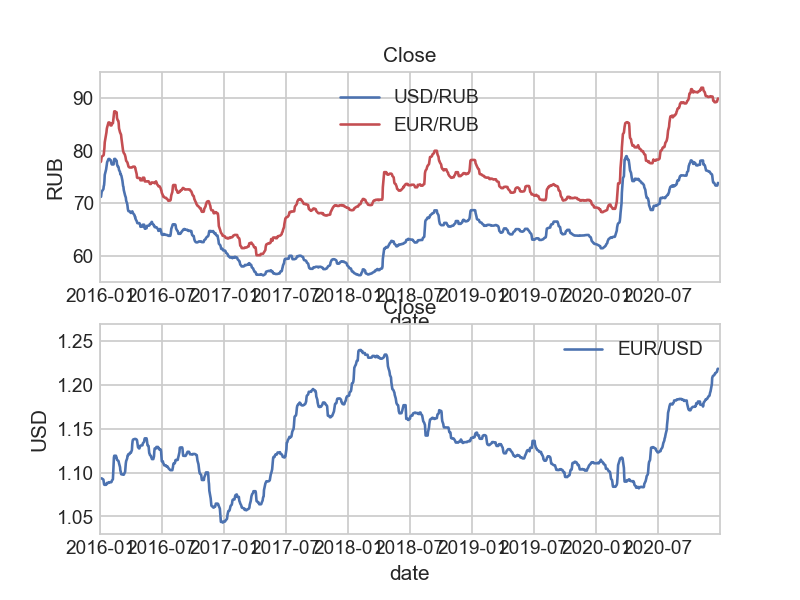

In [19]:
fig, ax = plt.subplots(2)
ax[0].plot(df_usd.index, df_usd["close"].rolling(window=10).median(),'b',label='USD/RUB')
ax[0].plot(df_eur.index, df_eur["close"].rolling(window=10).median(),'r',label='EUR/RUB')
ax[0].set(xlim=(date(2016,1,1),date(2020,12,31)), ylim=(55,95), xlabel='date', ylabel='RUB', title='Close')
leg=ax[0].legend()
ax[1].plot(df_usd.index, (df_eur["close"]/df_usd["close"]).rolling(window=10).median(),'b',label='EUR/USD')
ax[1].set(xlim=(date(2016,1,1),date(2020,12,31)), ylim=(1.03,1.27), xlabel='date', ylabel='USD', title='Close')
ax[1].legend()

In [20]:
q=moex.load_intraday_quotes("USD000UTSTOM")

In [21]:
q

IntradayQuote(instrument='USD000UTSTOM', last=74.415, num_trades=65036, trading_status=False, time=datetime.time(23, 49, 59))

In [22]:
q1=moex.load_intraday_quotes("USD000UTSTOM")

In [23]:
q==q1

True